# Gold Price VS Import Values and Export Values ##

We are interested in determing the relationship between gold price versus import values and gold price versus export values. To find out, we obtain monthly gold price from Internet, monthly import and export value for different countries from IMF data library. 

## Extract import values and Export values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np
import statsmodels.formula.api as smf

Define functions to split values for different countries

In [2]:
# get import values for select country
def selectImportCountry(country):
    selector = import_data[['Country Name']].values == country
    temp = import_data[selector]
    temp = temp[temp['Time Period'].astype('string').str.contains('M')]
    temp['Time Period'] = temp['Time Period'].astype('string').str.replace('M','-')
    temp['Time Period'] = pd.to_datetime(temp['Time Period'])
    temp.sort_values(['Time Period'], ascending = 1)
    return temp.drop(['Indicator Code','Country Code'], axis = 1)

In [3]:
# get export vlues for select country
def selectExportCountry(country):
    selector = export_data[['Country Name']].values == country
    temp = export_data[selector]
    temp = temp[temp['Time Period'].astype('string').str.contains('M')]
    temp['Time Period'] = temp['Time Period'].astype('string').str.replace('M','-')
    temp['Time Period'] = pd.to_datetime(temp['Time Period'])
    temp.sort_values(['Time Period'], ascending = 1)
    return temp.drop(['Indicator Code','Country Code'], axis = 1)

In [4]:
# calculate the correlation between gold price and import or export values
def calCorrelation(dataFrame):
    corr = dataFrame['gold price'].corr(dataFrame['Value'])
    print corr

In [5]:
# normalized data
def normalizeDate(dataframe):
    dataframe['normalized gold price'] = \
    (dataframe['gold price']- dataframe['gold price'].mean())/(dataframe['gold price'].std()/np.sqrt(dataframe['Time Period'].size))
    dataframe['normalized value'] = \
    (dataframe['Value'] - dataframe['Value'].mean())/(dataframe['Value'].std()/np.sqrt(dataframe['Time Period'].size))                                                             

In [6]:
# calculate the correlation after normalization
def calNormCorrelation(dataFrame):
    normalCorr = dataFrame['normalized gold price'].corr(dataFrame['normalized value'])
    print normalCorr

In [7]:
# calculate the correlation after normalization
def getNormCorrelation(dataFrame):
    normalCorr = dataFrame['normalized gold price'].corr(dataFrame['normalized value'])
    return normalCorr

In [8]:
# plot time vs gold price and import or export values
def plotTimeSeriesData(dataFrame, isImport):
    dataFrame.plot(x = ['Time Period'], y = ['normalized gold price','normalized value'])
    if(isImport):
        plt.title('Gold Price VS ' + dataFrame['Country Name'][0] + ' import values')
    else:
        plt.title('Gold Price VS ' + dataFrame['Country Name'][0] + ' export values')

In [9]:
# summarize results
def summaryResult(dataFrame):
    x = dataFrame['normalized gold price']
    y = dataFrame['normalized value']
    results = smf.OLS(y,x).fit()
    #print dataFrame['Country Name'][0]
    print results.summary()
    print "~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n \n \n"

Fetch date from pre-processed dataset

In [10]:
import_data = pd.read_csv('import_value.csv').drop('Unnamed: 0',1).drop('Status',1).drop('Unnamed: 7',1)
export_data = pd.read_csv('export_value.csv').drop('Unnamed: 0',1).drop('Status',1).drop('Unnamed: 7',1)
gold_price = pd.read_csv('gold price.csv')
gold_price.columns=['Time Period','gold price']
gold_price['Time Period'] = pd.to_datetime(gold_price['Time Period'])

In [11]:
# final all unique countries in both import data and export data
country_name_1 = import_data['Country Name'].unique()
country_name_2 = export_data['Country Name'].unique()
country_name = set(country_name_1).intersection(country_name_2)
country_name =list(country_name)


In [12]:
# generate import and exprot countries lists
country_name_import = []
country_name_export = []
N_countries = len(country_name)
for i in range(0,N_countries):
    country_name_import.append(country_name[i] + "" + "_import")
    country_name_export.append(country_name[i] + "" + "_export")

In [13]:
# extract import and export values for each country
for i in range(N_countries):
    country_name_import[i] = selectImportCountry(country_name[i]).sort_values(['Time Period'], ascending = 1)
    country_name_export[i] = selectExportCountry(country_name[i]).sort_values(['Time Period'], ascending = 1)

In [14]:
# delete empty dataframe in import data
temp_import_list = []
for i in range(N_countries):
    temp_import_df = country_name_import[i]
    if(temp_import_df.size != 0):
        temp_import_list.append(temp_import_df)
country_name_import = temp_import_list

In [15]:
# delete empty dataframe in export data
temp_export_list = []
for i in range(N_countries):
    temp_export_df = country_name_export[i]
    if(temp_export_df.size != 0):
        temp_export_list.append(temp_export_df)
country_name_export = temp_export_list

In [16]:
# create two new list to contain gold price versus import and export values for each countries
gold_country_import = []
gold_country_export = []
N_import = len(country_name_import)
N_export = len(country_name_export)
for i in range(N_import):
    gold_country_import.append("gold_" + country_name[i] + "_import")
for i in range(N_export):
    gold_country_export.append("gold_" + country_name[i] + "_export")

In [17]:
# concatenate gold price and import, export values
for i in range(N_import):
    gold_country_import[i] = pd.merge(gold_price, country_name_import[i], on='Time Period')
for i in range(N_export):
    gold_country_export[i] = pd.merge(gold_price, country_name_export[i], on='Time Period')

In [18]:
# normalize the data 
for i in range(N_import):
    normalizeDate(gold_country_import[i])
for i in range(N_export):
    normalizeDate(gold_country_export[i])

In [19]:
# print out all country name in import list
print "Import List"
print
for i in range(N_import):
    print i
    print gold_country_import[i]['Country Name'][0]
    print "------------------------------------\n"

Import List

0
Canada
------------------------------------

1
Venezuela, Republica Bolivariana de
------------------------------------

2
Lithuania
------------------------------------

3
Slovak Republic
------------------------------------

4
Burkina Faso
------------------------------------

5
Ghana
------------------------------------

6
Saudi Arabia
------------------------------------

7
Japan
------------------------------------

8
Germany
------------------------------------

9
St. Lucia
------------------------------------

10
Bahrain, Kingdom of
------------------------------------

11
Spain
------------------------------------

12
Netherlands
------------------------------------

13
Pakistan
------------------------------------

14
Oman
------------------------------------

15
Tanzania
------------------------------------

16
Cabo Verde
------------------------------------

17
Gabon
------------------------------------

18
New Zealand
------------------------------------

19


In [20]:
# print all country name in export list
print "Export List"
print
for i in range(N_export):
    print i
    print gold_country_export[i]['Country Name'][0]
    print "------------------------------------\n"

Export List

0
Canada
------------------------------------

1
Venezuela, Republica Bolivariana de
------------------------------------

2
Lithuania
------------------------------------

3
Slovak Republic
------------------------------------

4
Burkina Faso
------------------------------------

5
Ghana
------------------------------------

6
Saudi Arabia
------------------------------------

7
Japan
------------------------------------

8
Germany
------------------------------------

9
St. Lucia
------------------------------------

10
Bahrain, Kingdom of
------------------------------------

11
Spain
------------------------------------

12
Netherlands
------------------------------------

13
Pakistan
------------------------------------

14
Oman
------------------------------------

15
Tanzania
------------------------------------

16
Cabo Verde
------------------------------------

17
Gabon
------------------------------------

18
New Zealand
------------------------------------

19


### Now you have all index numbers for each different countries in both lists. You can enter index of country you interest and rest of program will generate result for you automatically. Notice! It may contain NaN in some of export countries.

#### Enter index number of country you interesed in import list

In [21]:
index_import = 1

#### Enter index number of country you interesed in export list

In [22]:
index_export = 2

#### Indicate you are interesed in import or export. True means import, False means export

In [23]:
isImport = False

Lithuania


Gold Price VS Export Value Correlation
0.928788927868




                            OLS Regression Results                            
Dep. Variable:       normalized value   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1576.
Date:                Wed, 24 Feb 2016   Prob (F-statistic):          3.40e-110
Time:                        08:34:29   Log-Likelihood:                -803.64
No. Observations:                 252   AIC:                             1609.
Df Residuals:                     251   BIC:                             1613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

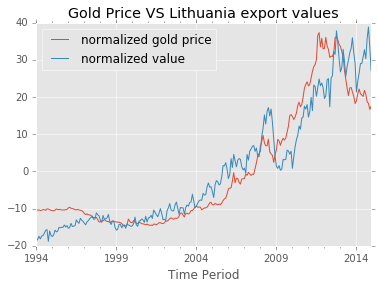

In [24]:
# detect your import or export option then run and display output
if(isImport):
    print gold_country_import[index_import]['Country Name'][0] # print out import country name
    print "\n"
    print "Gold Price VS Import Value Correlation"
    calNormCorrelation(gold_country_import[index_import]) # print out correlation value after normalization
    print "\n"
    plotTimeSeriesData(gold_country_import[index_import], isImport) # plot time series vs gold price and import values
    print "\n"
    summaryResult(gold_country_import[index_import]) # plot summary of result
else: 
    print gold_country_export[index_export]['Country Name'][0]  # print out export country name
    print "\n"
    print "Gold Price VS Export Value Correlation" 
    calNormCorrelation(gold_country_export[index_export]) # print out correlation valure after normalization
    print "\n"
    plotTimeSeriesData(gold_country_export[index_export], isImport) # plot time series vs gold price and exprot values
    print "\n"
    summaryResult(gold_country_export[index_export]) # plot summary of result

### From the result, there are 95 countries or regions in import countries list (107 different countries and regions in total) show a strong correlation (correlation > 0.6) between gold price and import value while there are 75 countries or regions in export countries list(107 different countries and regions in total) show a strong correlation (correlation > 0.6) between gold price and export value. Thus, we can conclude there exists a strong correlation between gold price and import/export values.
### Furthermore, we found that for most of developed countries, gold price has a strong correlation with import/export values. And for those developing countries and underdeveloped countries, gold price has a strong relationship with import values, but correlation may vary on export values. 